# **Notebook 4: Forma de los Datos**

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import tadasets
import gudhi as gd
import ripser
import persim
plt.rcParams.update(plt.rcParamsDefault)

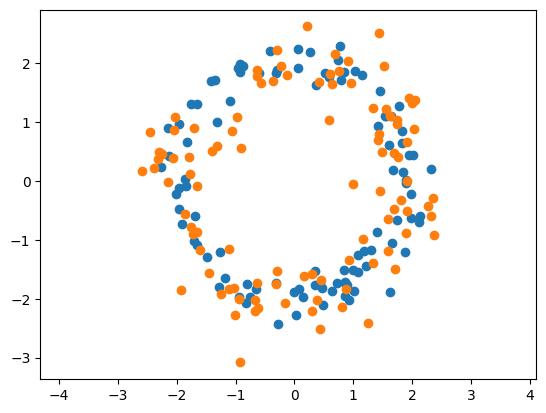

In [4]:
np.random.seed(2879)
datos_Circunferencia = tadasets.dsphere(n=100, d=1,r=2, noise=0.2)
datos_Circunferencia2 = tadasets.dsphere(n=100, d=1,r=2, noise=0.4)
plt.scatter(datos_Circunferencia[:,0],datos_Circunferencia[:,1])
plt.scatter(datos_Circunferencia2[:,0],datos_Circunferencia2[:,1])
plt.axis('equal')
plt.show()

Longitud del Vector de Persistencias:  111


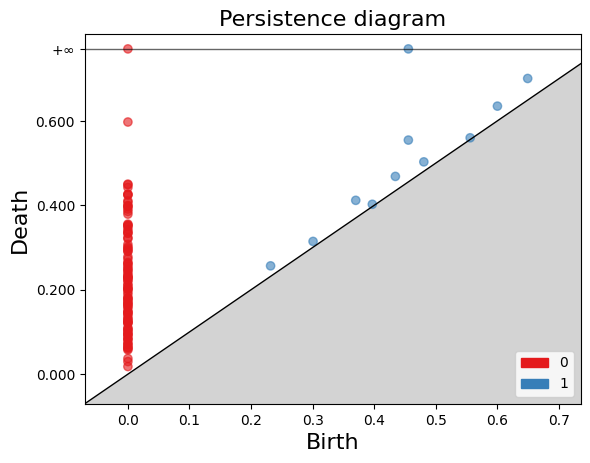

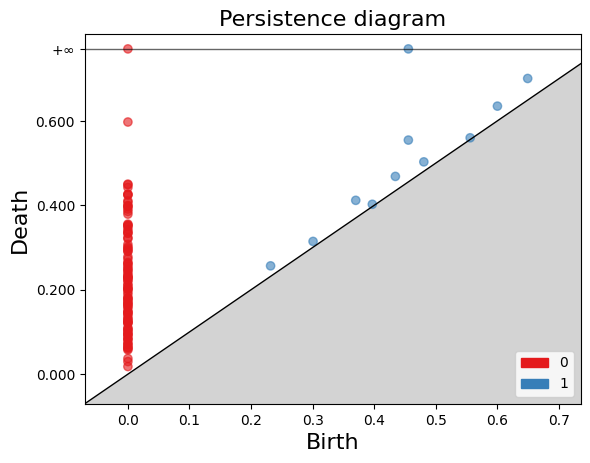

In [6]:
skeleton_circ_1 = gd.RipsComplex(points=datos_Circunferencia, max_edge_length=2)

#Aqui vamos a pedir que nuestro complejo sea maximo de dimension 1 ( o sea, solo tengo vertices y aristas)
Rips_simplex_tree_1=skeleton_circ_1.create_simplex_tree(max_dimension=2)
Barcodes_Rips_circ_1=Rips_simplex_tree_1.persistence()
print("Longitud del Vector de Persistencias: ",len(Barcodes_Rips_circ_1))
gd.plot_persistence_diagram(Barcodes_Rips_circ_1)
plt.show()

Longitud del Vector de Persistencias:  113


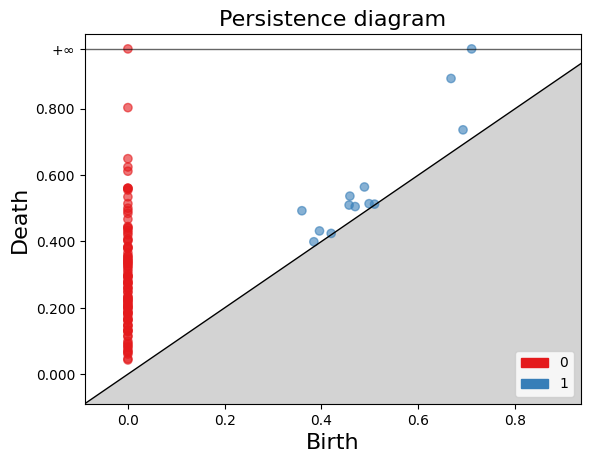

In [7]:
skeleton_circ_2 = gd.RipsComplex(points=datos_Circunferencia2, max_edge_length=2)

#Aqui vamos a pedir que nuestro complejo sea maximo de dimension 1 ( o sea, solo tengo vertices y aristas)
Rips_simplex_tree_2=skeleton_circ_2.create_simplex_tree(max_dimension=2)
Barcodes_Rips_circ_2=Rips_simplex_tree_2.persistence()
print("Longitud del Vector de Persistencias: ",len(Barcodes_Rips_circ_2))
gd.plot_persistence_diagram(Barcodes_Rips_circ_2)
plt.show()

### **Distancia Bottleneck**

In [8]:
persistence1 = np.array([Barcodes_Rips_circ_1[i][1] for i in range(len(Barcodes_Rips_circ_1))])
persistence2 = np.array([Barcodes_Rips_circ_2[i][1] for i in range(len(Barcodes_Rips_circ_2))])
gd.bottleneck_distance(persistence1,persistence2)

0.25476730084909655

### **Distancia Wasserstein**

In [15]:
#from gudhi.wasserstein import wasserstein_distance

In [16]:
#wasserstein_distance(persistence1,persistence2,order=1, internal_p=2)

### **Imagenes de Persistencia**

In [17]:
from itertools import product
import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

In [18]:
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = [np.array([[0.5,0.8],[0.7,2.2], [2.5,4.0]])
         ,np.array([[0.1,0.2],[3.1,3.3], [1.6,2.9]])
         ,np.array([[0.2,1.5],[0.4,0.6], [0.2,2.6]])]
pimgr.fit(pdgms,skew=True)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.1, 3.1), pers_range=(-8.326672684688674e-17, 2.5), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(6, 5)


In [19]:
pimgs = pimgr.transform(pdgms,skew=True)
pimgs[0]

array([[0.03999068, 0.05688393, 0.06672051, 0.06341749, 0.04820814],
       [0.04506697, 0.06556791, 0.07809764, 0.07495246, 0.05730671],
       [0.04454486, 0.06674611, 0.08104366, 0.07869919, 0.06058808],
       [0.04113063, 0.0636504 , 0.07884635, 0.07747833, 0.06005714],
       [0.03625436, 0.05757744, 0.07242608, 0.07180125, 0.05593626],
       [0.02922239, 0.04712024, 0.05979033, 0.05956698, 0.04653357]])

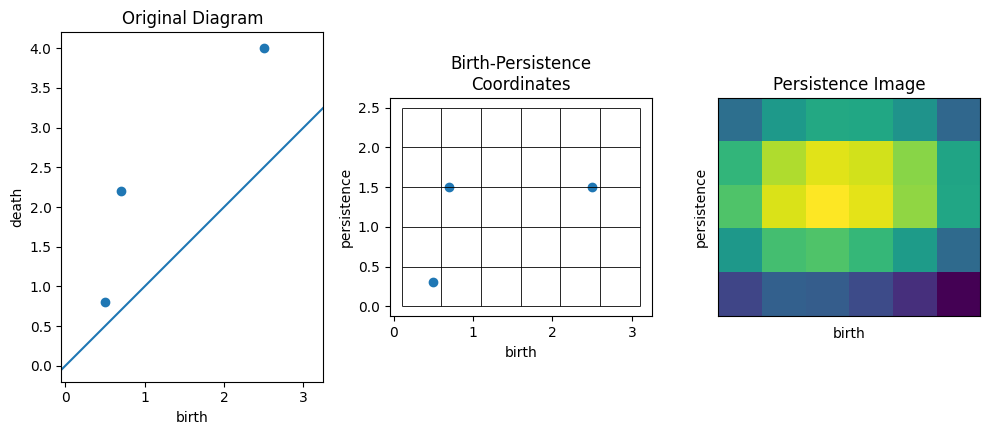

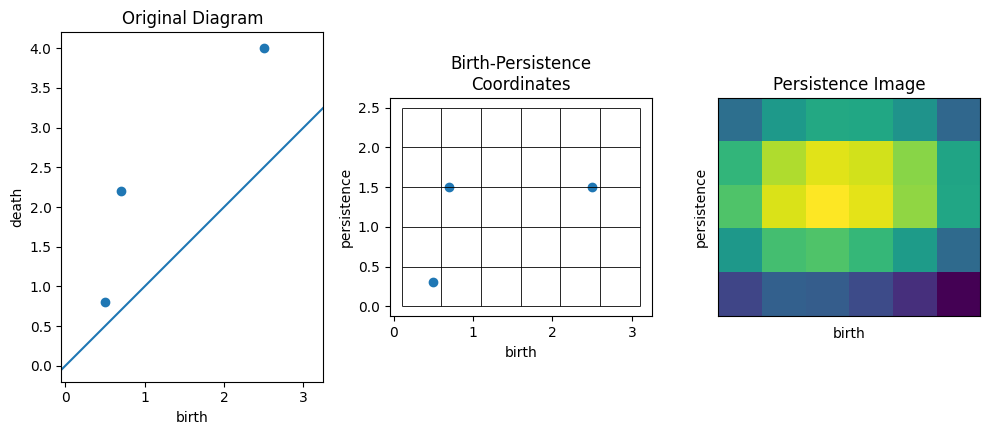

In [21]:
fig,axs = plt.subplots(1,3,figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(pdgms[0],skew=False,ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(pdgms[0],skew=True,ax=axs[1])

axs[2].set_title("Persistence Image")
pimgr.plot_image(pimgs[0],ax=axs[2])

plt.tight_layout()
plt.show()